In [32]:
import pandas as pd
import os
from typing import Literal
import matplotlib.pyplot as plt
import seaborn as sns
import random

# dir = "C:/Users/Will/Desktop/results/"

# a =  pd.read_csv(dir +'results_bct.csv')
# b = pd.read_csv(dir + 'results_bct_2.csv')
# c = pd.concat([a, b])


# gnm = pd.concat([pd.read_csv('results_gnm_num.csv'), pd.read_csv('results_gnm_num_2.csv')])
# print(c)
# bct = pd.read_csv('results_bct_num.csv')
# gnm = gnm.loc[gnm['time_gnm'] < 4]

gnm = pd.read_csv('C:/Users/Will/Documents/projects/GenerativeNetworkModels/results_gnm_num_2.csv')
bct = pd.read_csv('C:/Users/Will/Documents/projects/GenerativeNetworkModels/results_bct_num_2.csv')

bct = bct.loc[bct['time_bct'] != 0]

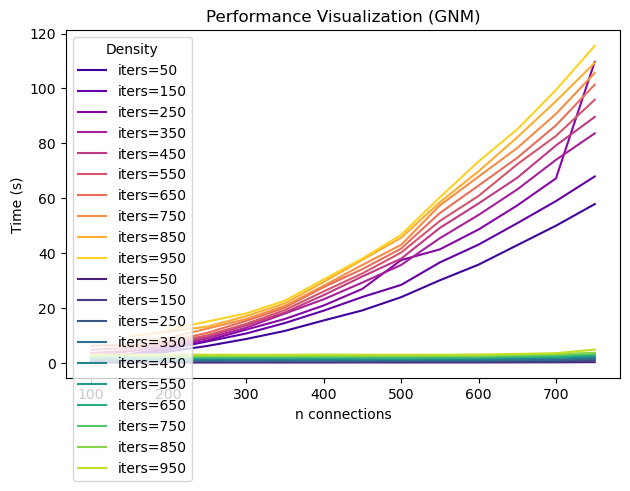

In [33]:

def visualize_performance(df, gnm_or_bct: Literal['gnm', 'bct']):
    #plt.figure(figsize=(8, 6))
    cmap_choice = {'gnm':'viridis', 
                   'bct':'plasma'}
    
    palette = sns.color_palette(cmap_choice[gnm_or_bct], len(df['num_connections'].unique()))
    
    for i, d in enumerate(sorted(df['num_connections'].unique())):
        tmp_df = df[df['num_connections'] == d] + random.uniform(-0.1, 0.1)
        
        plt.plot(tmp_df['connectome_size'], 
                 tmp_df[f'time_{gnm_or_bct}'], 
                 label=f'iters={d}',
                 color=palette[i])
        
        #tmp_df[f'time_{gnm_or_bct}']
    
    plt.legend(title="Density")
    plt.xlabel("n connections")
    plt.ylabel("Time (s)")
    plt.title(f"Performance Visualization ({gnm_or_bct.upper()})")


visualize_performance(bct, 'bct')
# plt.tight_layout()
# plt.show()
visualize_performance(gnm, 'gnm')
plt.tight_layout()
plt.show()

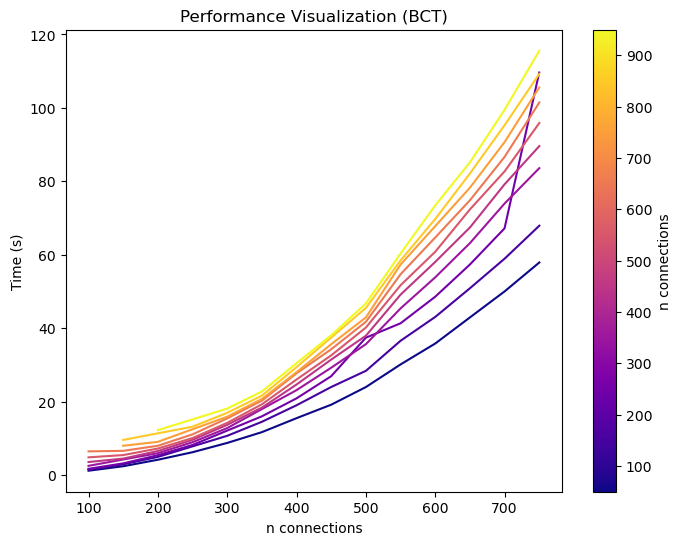

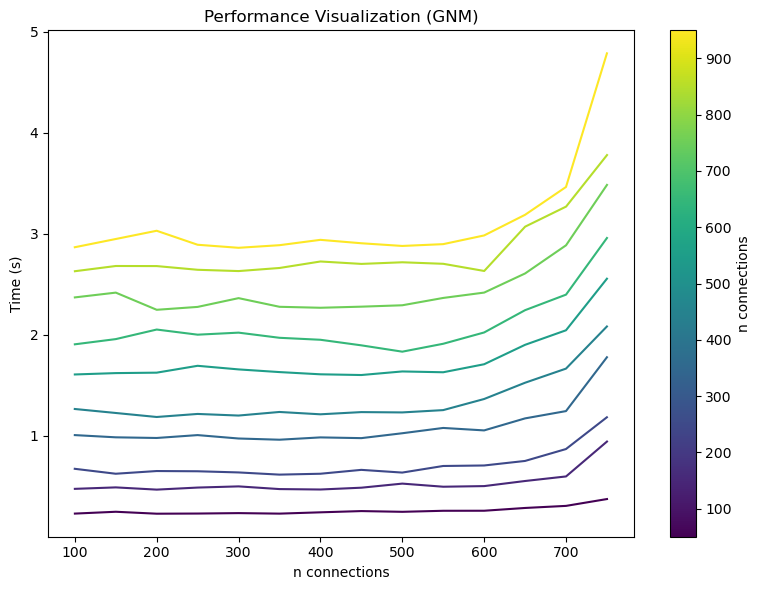

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

def visualize_performance(df, gnm_or_bct: Literal['gnm', 'bct']):
    cmap_choice = {'gnm': 'viridis', 'bct': 'plasma'}
    
    unique_connections = sorted(df['num_connections'].unique())
    norm = plt.Normalize(min(unique_connections), max(unique_connections))
    cmap = plt.get_cmap(cmap_choice[gnm_or_bct])
    
    fig, ax = plt.subplots(figsize=(8, 6))

    for d in unique_connections:
        tmp_df = df[df['num_connections'] == d] + random.uniform(-0.1, 0.1)
        ax.plot(tmp_df['connectome_size'], 
                tmp_df[f'time_{gnm_or_bct}'], 
                color=cmap(norm(d)))

    # Create an invisible scatter plot to generate a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label="n connections")

    plt.xlabel("n connections")
    plt.ylabel("Time (s)")
    plt.title(f"Performance Visualization ({gnm_or_bct.upper()})")

# Example calls:
visualize_performance(bct, 'bct')
visualize_performance(gnm, 'gnm')

plt.tight_layout()
plt.show()


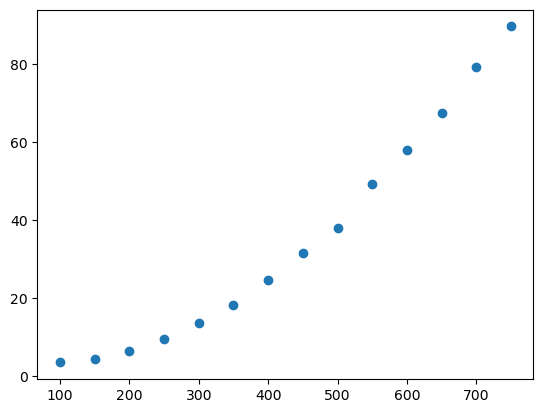

In [20]:
bc = bct.loc[bct['num_connections'] == 450]
plt.scatter(bc['connectome_size'], bc['time_bct'])

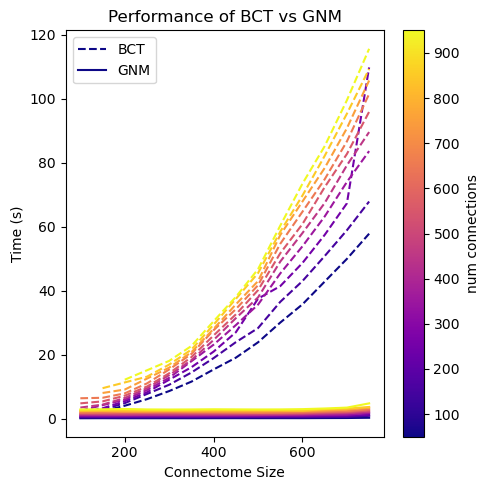

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from typing import Literal

def visualize_performance(df_bct, df_gnm, title):
    cmap_choice = {'gnm': 'viridis', 'bct': 'plasma'}
    
    unique_connections_bct = sorted(df_bct['num_connections'].unique())
    unique_connections_gnm = sorted(df_gnm['num_connections'].unique())
    
    norm_bct = plt.Normalize(min(unique_connections_bct), max(unique_connections_bct))
    norm_gnm = plt.Normalize(min(unique_connections_gnm), max(unique_connections_gnm))
    
    # cmap_bct = plt.get_cmap(cmap_choice['bct'])
    # cmap_gnm = plt.get_cmap(cmap_choice['gnm'])

    cmap_bct = plt.get_cmap('plasma')
    cmap_gnm = plt.get_cmap('plasma')
    
    fig, ax = plt.subplots(figsize=(5, 5))

    for d in unique_connections_bct:
        tmp_df = df_bct[df_bct['num_connections'] == d]
        ax.plot(tmp_df['connectome_size'], 
                tmp_df['time_bct'], 
                color=cmap_bct(norm_bct(d)), 
                label=f'BCT' if d == unique_connections_bct[0] else "",
                linestyle='dashed')

    for d in unique_connections_gnm:
        tmp_df = df_gnm[df_gnm['num_connections'] == d]
        ax.plot(tmp_df['connectome_size'], 
                tmp_df['time_gnm'], 
                color=cmap_gnm(norm_gnm(d)), 
                linestyle='-', 
                label=f'GNM' if d == unique_connections_gnm[0] else "")

    # Create an invisible scatter plot to generate a colorbar
    sm_bct = plt.cm.ScalarMappable(cmap=cmap_bct, norm=norm_bct)
    sm_bct.set_array([])
    sm_gnm = plt.cm.ScalarMappable(cmap=cmap_gnm, norm=norm_gnm)
    sm_gnm.set_array([])
    
    cbar_bct = fig.colorbar(sm_bct, ax=ax, label="num connections")
    #cbar_gnm = fig.colorbar(sm_gnm, ax=ax, label="GNM n connections")

    ax.set_xlabel("Connectome Size")
    ax.set_ylabel("Time (s)")
    ax.set_title(title)
    ax.legend()

visualize_performance(bct, gnm, title="Performance of BCT vs GNM")
plt.tight_layout()
plt.show()

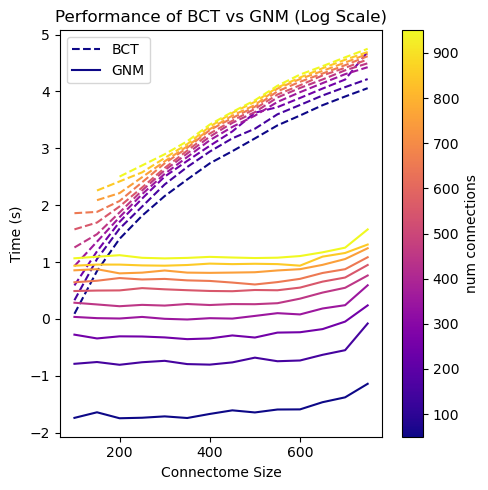

In [56]:
bct_log = bct.copy()
bct_log['time_bct'] = np.log(bct_log['time_bct'])
gnm_log = gnm.copy()
gnm_log['time_gnm'] = np.log(gnm_log['time_gnm'])

visualize_performance(bct_log, gnm_log, "Performance of BCT vs GNM (Log Scale)")
plt.tight_layout()
plt.show()